## EDA for News Article DataSet

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

/Users/avi/anaconda/envs/insight/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Populating the interactive namespace from numpy and matplotlib


### Load Data

In [56]:
file_name = '/Users/avi/Dropbox/Insight/Project/raw_data/news_data_all.csv'
all_news = pd.read_csv(file_name)

/Users/avi/anaconda/envs/insight/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
all_news.columns

Index(['index', 'id', 'title', 'author', 'date', 'content', 'year', 'month',
       'publication', 'category', 'digital', 'section', 'url'],
      dtype='object')

In [6]:
all_news.dtypes

index           object
id              object
title           object
author          object
date            object
content         object
year           float64
month          float64
publication     object
category        object
digital        float64
section         object
url             object
dtype: object

In [8]:
all_news.describe()

,year,month,digital
count,191530.000000,191530.000000,193115.000000
mean,2016.312374,5.723589,1.060435
std,0.833314,3.467818,1.200331
min,2000.000000,1.000000,0.000000
25%,2016.000000,3.000000,0.000000
50%,2016.000000,5.000000,1.000000
75%,2017.000000,9.000000,1.000000
max,2018.000000,12.000000,4.000000


In [7]:
all_news.head()

,id,title,author,date,content,year,month,publication,category,digital,section,url
0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017,5,Verge,Longform,1.0,None,None
1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017,5,Verge,Longform,1.0,None,None
2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017,5,Verge,Longform,1.0,None,None
3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017,5,Verge,Longform,1.0,None,None
4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017,5,Verge,Longform,1.0,None,None


In [57]:
all_news.isna().sum()

index               0
id                  0
title               5
author          54071
date            34274
content         37072
year            34274
month           34274
publication     29384
category        57091
digital         32689
section        151232
url            127008
dtype: int64

In [60]:
all_news = all_news[pd.notnull(all_news['content'])]

## Plot Distributions Over Variables

In [9]:
pub_count = all_news.groupby('publication')['id'].count().reset_index()
year_count = all_news.groupby('year')['id'].count().reset_index()
digital_count = all_news.groupby('digital')['id'].count().reset_index()
cat_count = all_news.groupby('category')['id'].count().reset_index()

### Publication

Text(0.5, 1.0, 'Distribution over Publications')

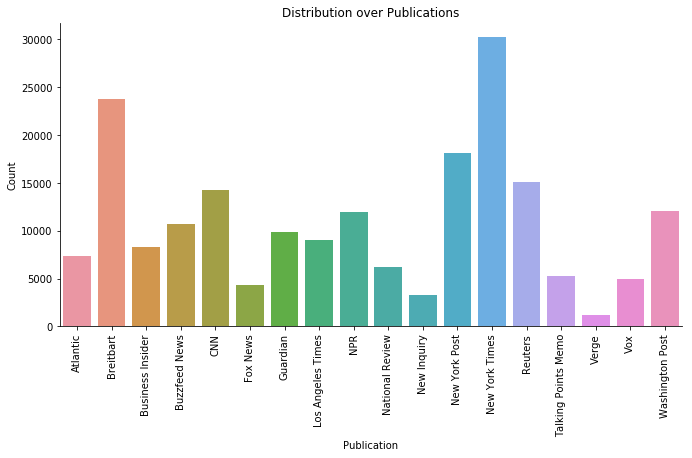

In [20]:
sns.catplot(x = 'publication', y = 'id', kind = 'bar', aspect = 2, data = pub_count)
plt.xticks(rotation=90)
plt.xlabel('Publication')
plt.ylabel('Count')
plt.title('Distribution over Publications')

### Year

Text(0.5, 1.0, 'Distribution over Years')

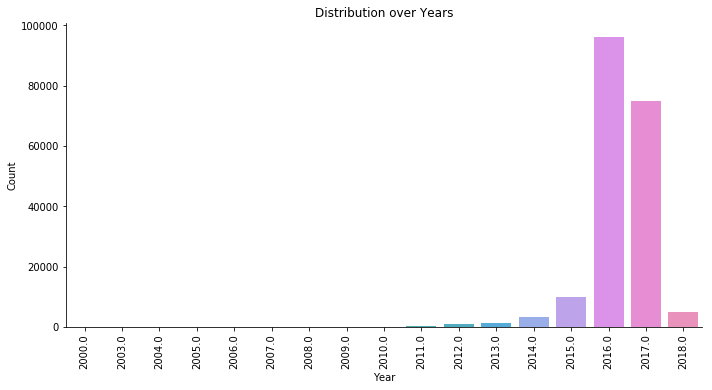

In [21]:
sns.catplot(x = 'year', y = 'id', kind = 'bar', aspect = 2, data = year_count)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution over Years')

### Publication x Year

In [18]:
pd.crosstab(table.publication,table.year)

year,2000,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,
publication,,,,,,,,,,,,,,,,,,
Atlantic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5312,2073,0,0
Breitbart,0,0,0,0,0,0,0,0,0,0,0,2,1,72,16109,7607,0,0
Business Insider,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5723,2621,0,0
Buzzfeed News,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8048,2651,0,0
CNN,0,0,0,0,0,0,0,0,0,1,26,223,120,4314,4114,3829,0,0
Fox News,0,0,1,0,0,0,0,0,0,1,0,0,3,25,4351,0,0,2
Guardian,0,0,0,0,0,0,0,1,2,0,0,1,3,12,4998,4814,0,0
Los Angeles Times,0,0,0,0,0,0,0,0,0,0,1,0,2124,4357,51,2491,0,0
NPR,1,1,0,1,0,0,2,2,4,4,5,12,23,118,7654,4174,0,0


### Category

Text(0.5, 1.0, 'Distribution over Category')

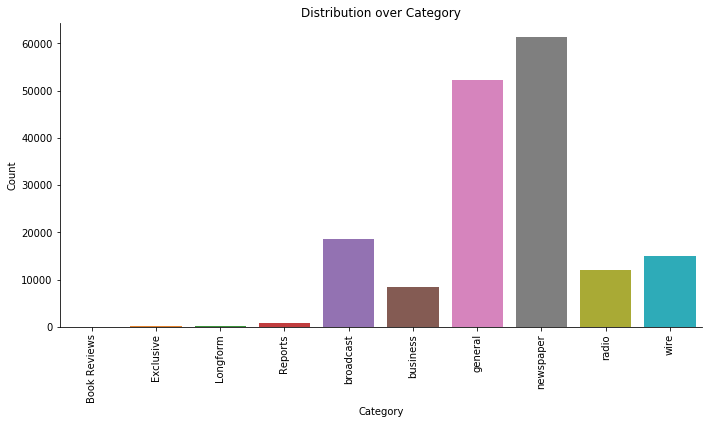

In [22]:
sns.catplot(x = 'category', y = 'id', kind = 'bar', aspect = 2, data = cat_count)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution over Category')

### Digital

In [17]:
### Not sure what this digital variable mean

Text(0.5, 1.0, 'Distribution over Digital')

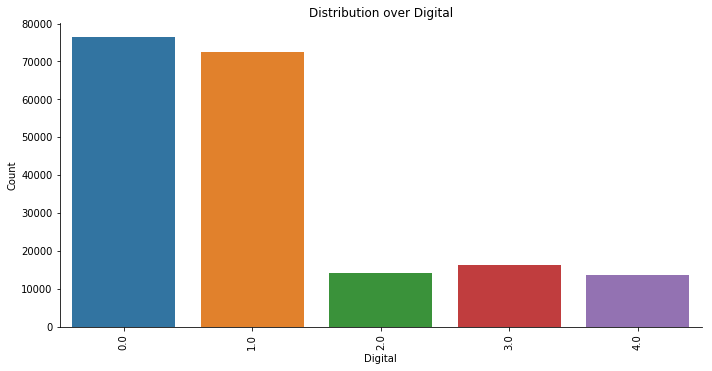

In [23]:
sns.catplot(x = 'digital', y = 'id', kind = 'bar', aspect = 2, data = digital_count)
plt.xticks(rotation=90)
plt.xlabel('Digital')
plt.ylabel('Count')
plt.title('Distribution over Digital')

### Article Length

In [63]:
#Create column that counts number of words in article
all_news['article_size'] = all_news.apply(lambda x: len(x['content'].split(" ")),axis=1)

/Users/avi/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/avi/anaconda/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


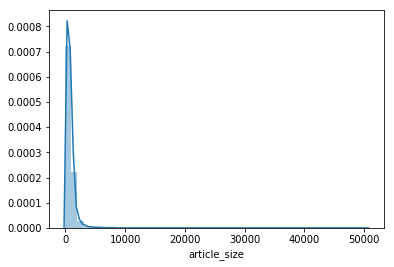

In [68]:
sns.distplot(all_news['article_size'])

In [80]:
all_news['article_size_log'] = np.log(all_news['article_size'])

/Users/avi/anaconda/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


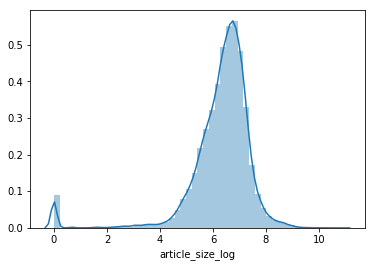

In [81]:
sns.distplot(all_news['article_size_log'])

In [100]:
len(all_news[all_news['article_size']<100])/len(all_news)

0.04622957421105059

In [101]:
## only include articles with more than 100 words

#filter articles
articles_use = all_news[all_news['article_size']>100]

#save to csv
articles_use.to_csv('/Users/avi/Dropbox/Insight/Project/raw_data/news_data_clean.csv')